# Question 1:

Write an algorithm that removes the minimum number of predictors to ensure that all pairwise correlation are below a certain threshold. The algorithm is as follows:

- Calculate the correlation matrix of the predictors.
- Determine the two predictors associated with the largest absolute pairwise correlation (A and B).
- Determine the average absolute correlation between A and the other variables. Do the same for predictor B.
- If A has a larger average correlation, remove it; otherwise, remove predictor B.
- Repeat Steps 2-4 until no absolute correlations are above the threshold.

Let's use threshold=0.75. This means that we want to eliminate the minimum number of predictors to achieve all pairwise correlations less than 0.75.

## Question 1a: 

Write a function that takes data and threshold as an argument and outputs new data processed according to the above algorithm:

In [495]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()


In [161]:
def checker(data, t, n = None):
#     cor_m = data.corr()
    
    
    np.fill_diagonal(corr.values, np.nan)
    
    # Create a mask to hide the duplicates on the upper triangle of the matrix
    mask = np.triu(np.ones_like(corr, dtype=bool)) 
    
     # Apply the mask, filter the matrix based on the positive and negative input bound
    mask_corr = corr.where(mask).stack().reset_index()
    filtered_corr = mask_corr[(mask_corr[0] >= t) | (mask_corr[0] <= -t)] # Maintaining the + / - values

    # Label & Sort the Columns
    filtered_corr.columns = ['Row Stat', 'Column Stat', 'Correlation']
    sort_corr = filtered_corr.sort_values(by='Correlation', ascending=False)

    print(sort_corr.head(n))
    print(sort_corr.tail(n))

    return sort_corr

    
    

## Question 1b:

Test your function on the dataframe that we used in class. In my notebook I called it `cell_train_feature`

In [162]:
cell_train_subset= pd.read_csv('segmentationOriginal.csv')
# cell_train_subset = df[['Class', 'AvgIntenCh1', 'EntropyIntenCh1']]
cell_train_subset.head()


,Unnamed: 0,Cell,Case,Class,AngleCh1,AngleStatusCh1,AreaCh1,AreaStatusCh1,AvgIntenCh1,AvgIntenCh2,...,VarIntenCh1,VarIntenCh3,VarIntenCh4,VarIntenStatusCh1,VarIntenStatusCh3,VarIntenStatusCh4,WidthCh1,WidthStatusCh1,XCentroid,YCentroid
0,0,207827637,Test,PS,143.247705,1,185,0,15.711864,3.954802,...,12.474676,7.609035,2.714100,0,2,2,10.642974,2,42,14
1,1,207932307,Train,PS,133.752037,0,819,1,31.923274,205.878517,...,18.809225,56.715352,118.388139,0,0,0,32.161261,1,215,347
2,2,207932463,Train,WS,106.646387,0,431,0,28.038835,115.315534,...,17.295643,37.671053,49.470524,0,0,0,21.185525,0,371,252
3,3,207932470,Train,PS,69.150325,0,298,0,19.456140,101.294737,...,13.818968,30.005643,24.749537,0,0,2,13.392830,0,487,295
4,4,207932455,Test,PS,2.887837,2,285,0,24.275735,111.415441,...,15.407972,20.504288,45.450457,0,0,0,13.198561,0,283,159


In [163]:
df_train = pd.get_dummies(cell_train_subset)
# del df_train['Unnamed']
df_train

,Unnamed: 0,Cell,AngleCh1,AngleStatusCh1,AreaCh1,AreaStatusCh1,AvgIntenCh1,AvgIntenCh2,AvgIntenCh3,AvgIntenCh4,...,VarIntenStatusCh3,VarIntenStatusCh4,WidthCh1,WidthStatusCh1,XCentroid,YCentroid,Case_Test,Case_Train,Class_PS,Class_WS
0,0,207827637,143.247705,1,185,0,15.711864,3.954802,9.548023,2.214689,...,2,2,10.642974,2,42,14,1,0,1,0
1,1,207932307,133.752037,0,819,1,31.923274,205.878517,69.916880,164.153453,...,0,0,32.161261,1,215,347,0,1,1,0
2,2,207932463,106.646387,0,431,0,28.038835,115.315534,63.941748,106.696602,...,0,0,21.185525,0,371,252,0,1,0,1
3,3,207932470,69.150325,0,298,0,19.456140,101.294737,28.217544,31.028070,...,0,2,13.392830,0,487,295,0,1,1,0
4,4,207932455,2.887837,2,285,0,24.275735,111.415441,20.474265,40.577206,...,0,0,13.198561,0,283,159,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014,2014,210948219,85.481047,0,302,0,42.041522,23.467128,143.532872,233.325260,...,0,0,24.979033,1,208,379,0,1,1,0
2015,2015,210952142,99.049010,0,607,0,38.803448,20.587931,78.372414,82.200000,...,0,0,24.524072,1,313,88,1,0,1,0
2016,2016,210952338,83.319801,0,204,0,37.866667,5.994872,59.789744,148.235897,...,2,2,9.985410,2,291,402,1,0,1,0
2017,2017,210948231,116.473894,0,390,0,45.643432,169.123324,147.498660,338.117962,...,0,0,22.440286,1,100,448,1,0,0,1


In [164]:
#  = cell_train_subset
checker(df_train, 0.75, n =10)

                 Row Stat       Column Stat  Correlation
174    Class_2-4-d-injury            Date_?          1.0
8334     Leafspots-marg_?       Leaf-Malf_?          1.0
10993       Fruit-Spots_?   Seed-Discolor_?          1.0
10145     Canker-Lesion_?  External-Decay_?          1.0
9920       Stem-Cankers_?       Sclerotia_?          1.0
6748           Severity_?         Lodging_?          1.0
9913       Stem-Cankers_?        Mycelium_?          1.0
5302               Hail_?        Severity_?          1.0
5306               Hail_?        Seed-Tmt_?          1.0
9910       Stem-Cankers_?  External-Decay_?          1.0
              Row Stat     Column Stat  Correlation
10146  Canker-Lesion_?      Mycelium_0    -0.916753
10439       Mycelium_0  Int-Discolor_?    -0.916753
9911    Stem-Cankers_?      Mycelium_0    -0.916753
6800        Severity_?         Roots_0    -0.923398
5393            Hail_?         Roots_0    -0.923398
7166        Seed-Tmt_?         Roots_0    -0.923398
9686     

,Row Stat,Column Stat,Correlation
174,Class_2-4-d-injury,Date_?,1.000000
8334,Leafspots-marg_?,Leaf-Malf_?,1.000000
10993,Fruit-Spots_?,Seed-Discolor_?,1.000000
10145,Canker-Lesion_?,External-Decay_?,1.000000
9920,Stem-Cankers_?,Sclerotia_?,1.000000
...,...,...,...
7166,Seed-Tmt_?,Roots_0,-0.923398
9686,Lodging_?,Roots_0,-0.923398
3794,Plant-stand_0,Plant-stand_1,-0.948973
7520,Plant-Growth_0,Plant-Growth_1,-0.992772


In [166]:
# Returns correlation matrix
def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    return xFiltered

# flattens correlation matrix with bounds
def corrFilterFlattened(x: pd.DataFrame, bound: float):
    xFiltered = corrFilter(x, bound)
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened

# Returns correlation for a variable from flattened correlation matrix
def filterForLabels(df: pd.DataFrame, label):  
    try:
        sideLeft = df[label,]
    except:
        sideLeft = pd.DataFrame()

    try:
        sideRight = df[:,label]
    except:
        sideRight = pd.DataFrame()

    if sideLeft.empty and sideRight.empty:
        return pd.DataFrame()
    elif sideLeft.empty:        
        concat = sideRight.to_frame()
        concat.rename(columns={0:'Corr'},inplace=True)
        return concat
    elif sideRight.empty:
        concat = sideLeft.to_frame()
        concat.rename(columns={0:'Corr'},inplace=True)
        return concat
    else:
        concat = pd.concat([sideLeft,sideRight], axis=1)
        concat["Corr"] = concat[0].fillna(0) + concat[1].fillna(0)
        concat.drop(columns=[0,1], inplace=True)
        return concat
 
                 
# df.head()

In [167]:
checker(cell_train_subset, 0.75, n =10)

                 Row Stat       Column Stat  Correlation
174    Class_2-4-d-injury            Date_?          1.0
8334     Leafspots-marg_?       Leaf-Malf_?          1.0
10993       Fruit-Spots_?   Seed-Discolor_?          1.0
10145     Canker-Lesion_?  External-Decay_?          1.0
9920       Stem-Cankers_?       Sclerotia_?          1.0
6748           Severity_?         Lodging_?          1.0
9913       Stem-Cankers_?        Mycelium_?          1.0
5302               Hail_?        Severity_?          1.0
5306               Hail_?        Seed-Tmt_?          1.0
9910       Stem-Cankers_?  External-Decay_?          1.0
              Row Stat     Column Stat  Correlation
10146  Canker-Lesion_?      Mycelium_0    -0.916753
10439       Mycelium_0  Int-Discolor_?    -0.916753
9911    Stem-Cankers_?      Mycelium_0    -0.916753
6800        Severity_?         Roots_0    -0.923398
5393            Hail_?         Roots_0    -0.923398
7166        Seed-Tmt_?         Roots_0    -0.923398
9686     

,Row Stat,Column Stat,Correlation
174,Class_2-4-d-injury,Date_?,1.000000
8334,Leafspots-marg_?,Leaf-Malf_?,1.000000
10993,Fruit-Spots_?,Seed-Discolor_?,1.000000
10145,Canker-Lesion_?,External-Decay_?,1.000000
9920,Stem-Cankers_?,Sclerotia_?,1.000000
...,...,...,...
7166,Seed-Tmt_?,Roots_0,-0.923398
9686,Lodging_?,Roots_0,-0.923398
3794,Plant-stand_0,Plant-stand_1,-0.948973
7520,Plant-Growth_0,Plant-Growth_1,-0.992772


In [175]:
corr_matrix = df.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)

sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
                  .stack()
                  .sort_values(ascending=False))

#first element of sol series is the pair with the biggest correlation

In [176]:
def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened

corrFilter(df, .7)


Stem_0             Stem_1             -0.993460
Plant-Growth_1     Plant-Growth_0     -0.992772
Plant-stand_0      Plant-stand_1      -0.948973
Lodging_?          Roots_0            -0.923398
Mycelium_?         Mycelium_0         -0.916753
                                         ...   
Temp_?             Plant-stand_?       0.933854
Leaf-Shread_?      Leafspots-marg_?    0.978841
Fruition-Bodies_?  Germination_?       0.984199
Leafspot-size_2    Leafspots-halo_0    0.992955
Leaves             Leaves                   NaN
Length: 112, dtype: float64

# Question 2:

Find the data under "Module" on canvas, called "soybean-large.data". The data were collected to predict disease in 307 soybeans. The 35 predictors are mostly categorical and include information on the environmental conditions (e.g., temperature, precipitation) and plant conditions (e.g., left spots, mold growth). The outcome labels consist of 19 distinct classes. Names of classes and column names could be found as "Attribute Information" here: https://archive.ics.uci.edu/ml/datasets/Soybean+(Large)



## Question 2a:

Load the data and name the columns based on attribute information.

In [529]:

df = pd.read_csv('soybean-large.csv')
                 
df.head()

,Class,Date,Plant-stand,Precip,Temp,Hail,Crop-hist,Area-Damaged,Severity,Seed-Tmt,...,Int-Discolor,Sclerotia,Fruit-Pods,Fruit-Spots,Seed,Mold-Growth,Seed-Discolor,Seed-Size,Shriveling,Roots
0,diaporthe-stem-canker,6,0,2,1,0,1,1,1,0,...,0,0,0,4,0,0,0,0,0,0
1,diaporthe-stem-canker,4,0,2,1,0,2,0,2,1,...,0,0,0,4,0,0,0,0,0,0
2,diaporthe-stem-canker,3,0,2,1,0,1,0,2,1,...,0,0,0,4,0,0,0,0,0,0
3,diaporthe-stem-canker,3,0,2,1,0,1,0,2,0,...,0,0,0,4,0,0,0,0,0,0
4,diaporthe-stem-canker,6,0,2,1,0,2,0,1,0,...,0,0,0,4,0,0,0,0,0,0


In [530]:
df.isnull().sum()

Class              0
Date               0
Plant-stand        0
Precip             0
Temp               0
Hail               0
Crop-hist          0
Area-Damaged       0
Severity           0
Seed-Tmt           0
Germination        0
Plant-Growth       0
Leaves             0
Leafspots-halo     0
Leafspots-marg     0
Leafspot-size      0
Leaf-Shread        0
Leaf-Malf          0
Leaf-Mild          0
Stem               0
Lodging            0
Stem-Cankers       0
Canker-Lesion      0
Fruition-Bodies    0
External-Decay     0
Mycelium           0
Int-Discolor       0
Sclerotia          0
Fruit-Pods         0
Fruit-Spots        0
Seed               0
Mold-Growth        0
Seed-Discolor      0
Seed-Size          0
Shriveling         0
Roots              0
dtype: int64

## Question 2b:

Investigate (visualize) the frequency distributions for the categorical predictors (for only 4 predictors of your choice).

In [498]:
df = df[['Class', 'Temp', 'Precip', 'Hail','Severity']]
df.head()

,Class,Temp,Precip,Hail,Severity
0,diaporthe-stem-canker,1,2,0,1
1,diaporthe-stem-canker,1,2,0,2
2,diaporthe-stem-canker,1,2,0,2
3,diaporthe-stem-canker,1,2,0,2
4,diaporthe-stem-canker,1,2,0,1


In [499]:

# df=pd.get_dummies(df)
df['Temp'] = df['Temp'].replace('?', 0)
df['Precip'] = df['Precip'].replace('?',0)
df['Severity'] = df['Severity'].replace('?', 0)
df['Hail'] = df['Hail'].replace('?', 0)
del df['Class']

df

,Temp,Precip,Hail,Severity
0,1,2,0,1
1,1,2,0,2
2,1,2,0,2
3,1,2,0,2
4,1,2,0,1
...,...,...,...,...
302,0,0,0,0
303,0,0,0,0
304,0,0,0,0
305,0,0,0,0


In [500]:
# df=pd.get_dummies(df)
df.describe()

,Temp,Precip,Hail,Severity
count,307,307,307,307
unique,4,4,3,4
top,1,2,0,1
freq,179,210,211,151


In [501]:
df.Temp.dtype

dtype('O')

In [503]:
df.astype(int)

,Temp,Precip,Hail,Severity
0,1,2,0,1
1,1,2,0,2
2,1,2,0,2
3,1,2,0,2
4,1,2,0,1
...,...,...,...,...
302,0,0,0,0
303,0,0,0,0
304,0,0,0,0
305,0,0,0,0


In [504]:
df=pd.get_dummies(df)
df.head()

,Temp_0,Temp_0,Temp_1,Temp_2,Precip_0,Precip_0,Precip_1,Precip_2,Hail_0,Hail_0,Hail_1,Severity_0,Severity_0,Severity_1,Severity_2
0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0
1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1
2,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1
3,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1
4,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0


In [522]:
predictors = df[['Temp_1', 'Precip_1']]
classes = df[['Hail_1']]

print(predictors.shape)
print(classes.shape)

(307, 2)
(307, 1)


In [523]:
# classes
# predictors

In [524]:
# df = df.T.drop_duplicates().T

In [525]:
# del predictors['Temp_0']
# del predictors['Precip_0']

# del classes['Hail_0']

print(predictors.shape)
print(classes.shape)

(307, 2)
(307, 1)


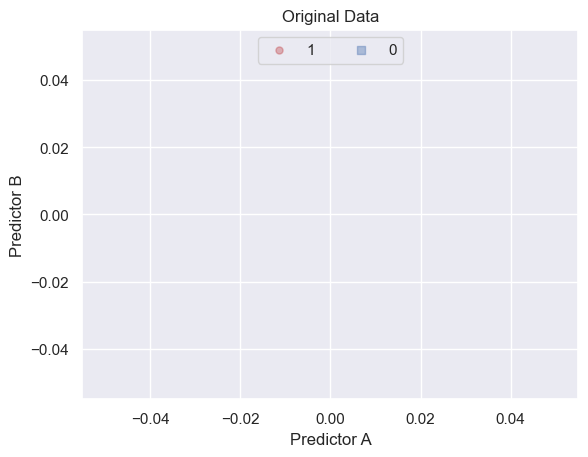

In [526]:
colors = ['r', 'b']
markers = ['o', 's']
c = ['1', '0']
for k, m in enumerate(colors):
    i = np.where(classes.iloc[:,0] == c[k])[0]
    if k == 0:
        plt.scatter(predictors.iloc[i, 0], predictors.iloc[i, 1], 
                    c=m, marker=markers[k], alpha=0.4, s=26, label='1')
    else:
        plt.scatter(predictors.iloc[i, 0], predictors.iloc[i, 1], 
                    c=m, marker=markers[k], alpha=0.4, s=26, label='0')

plt.title('Original Data')
plt.xlabel('Predictor A')
plt.ylabel('Predictor B')
plt.legend(loc='upper center', ncol=2)
plt.show()


In [527]:

X = np.array(predictors)
y = np.ravel(classes)

h = 0.001

# create a mesh to plot in
x_min, x_max = X[:, 0].min()-0.1, X[:, 0].max()+0.1 
y_min, y_max = X[:, 1].min()-0.1, X[:, 1].max()+0.1 

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


In [510]:
xx

array([[-0.1  , -0.099, -0.098, ...,  1.098,  1.099,  1.1  ],
       [-0.1  , -0.099, -0.098, ...,  1.098,  1.099,  1.1  ],
       [-0.1  , -0.099, -0.098, ...,  1.098,  1.099,  1.1  ],
       ...,
       [-0.1  , -0.099, -0.098, ...,  1.098,  1.099,  1.1  ],
       [-0.1  , -0.099, -0.098, ...,  1.098,  1.099,  1.1  ],
       [-0.1  , -0.099, -0.098, ...,  1.098,  1.099,  1.1  ]])

In [511]:
yy

array([[-0.1  , -0.1  , -0.1  , ..., -0.1  , -0.1  , -0.1  ],
       [-0.099, -0.099, -0.099, ..., -0.099, -0.099, -0.099],
       [-0.098, -0.098, -0.098, ..., -0.098, -0.098, -0.098],
       ...,
       [ 1.098,  1.098,  1.098, ...,  1.098,  1.098,  1.098],
       [ 1.099,  1.099,  1.099, ...,  1.099,  1.099,  1.099],
       [ 1.1  ,  1.1  ,  1.1  , ...,  1.1  ,  1.1  ,  1.1  ]])

In [512]:
Z3

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

In [491]:
# k nearest neigbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

neigh = KNeighborsClassifier(n_neighbors = 3)
neigh.fit(X, y)
Z3 = neigh.predict(np.c_[xx.ravel(), yy.ravel()])
Z3 = Z3.reshape(xx.shape)

Z3 = (Z3== 0).astype('int')

knn_params = {'n_neighbors':range(1, 100, 2)}

gs_neigh = GridSearchCV(KNeighborsClassifier(), knn_params, cv=2, n_jobs=-1)
gs_neigh.fit(X, y)

Z = gs_neigh.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
Z = (Z == 1).astype('int')


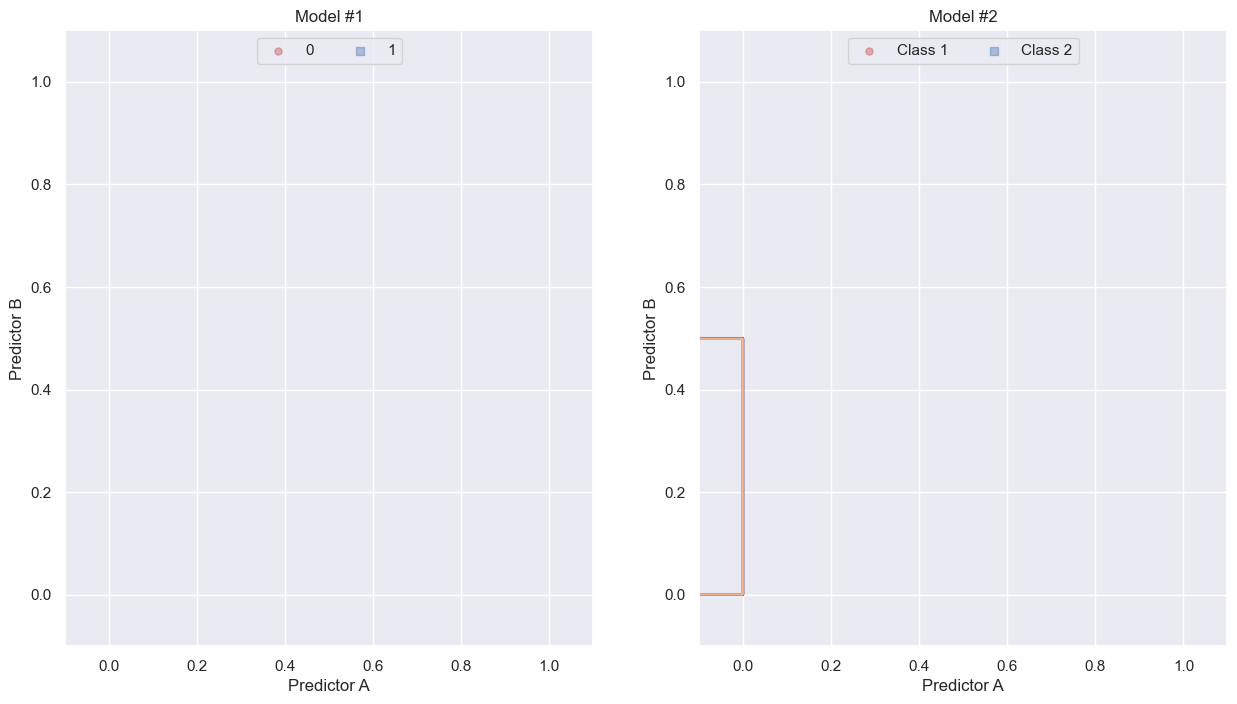

In [492]:
#visualize with boundaries

#visualize with boundaries

colors = ['r', 'b']
markers = ['o', 's']
c = ['0', '1']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

for k, m in enumerate(colors):
    i = np.where(classes.iloc[:,0] == c[k])[0]
    if k == 0:
        ax1.scatter(predictors.iloc[i, 0], predictors.iloc[i, 1], 
                    c=m, marker=markers[k], alpha=0.4, s=26, label='0')
    else:
        ax1.scatter(predictors.iloc[i, 0], predictors.iloc[i, 1], 
                    c=m, marker=markers[k], alpha=0.4, s=26, label='1')

ax1.set_title('Model #1')
ax1.set_xlabel('Predictor A')
ax1.set_ylabel('Predictor B')
ax1.legend(loc='upper center', ncol=2)
# plot boundary for classification. We need to provide the whole mashgrid and predictions for each point to draw bounds
ax1.contour(xx, yy, Z3)


for k, m in enumerate(colors):
    i = np.where(classes.iloc[:,0] == c[k])[0]
    if k == 0:
        ax2.scatter(predictors.iloc[i, 0], predictors.iloc[i, 1], 
                    c=m, marker=markers[k], alpha=0.4, s=26, label='Class 1')
    else:
        ax2.scatter(predictors.iloc[i, 0], predictors.iloc[i, 1], 
                    c=m, marker=markers[k], alpha=0.4, s=26, label='Class 2')

ax2.set_title('Model #2')
ax2.set_xlabel('Predictor A')
ax2.set_ylabel('Predictor B')
ax2.legend(loc='upper center', ncol=2)
# plot boundary
ax2.contour(xx, yy, Z)

plt.show()


In [513]:
gs_neigh.best_estimator_


KNeighborsClassifier(n_neighbors=15)

In [514]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets

from sklearn.model_selection import train_test_split

# Split the data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [515]:
scores_train = []
scores_test = []

for k in range(1, 33, 2):
    neigh_k = KNeighborsClassifier(n_neighbors=k)
    neigh_k.fit(X_train, y_train)
    scores_train.append(neigh_k.score(X_train, y_train))
    scores_test.append(neigh_k.score(X_test, y_test))


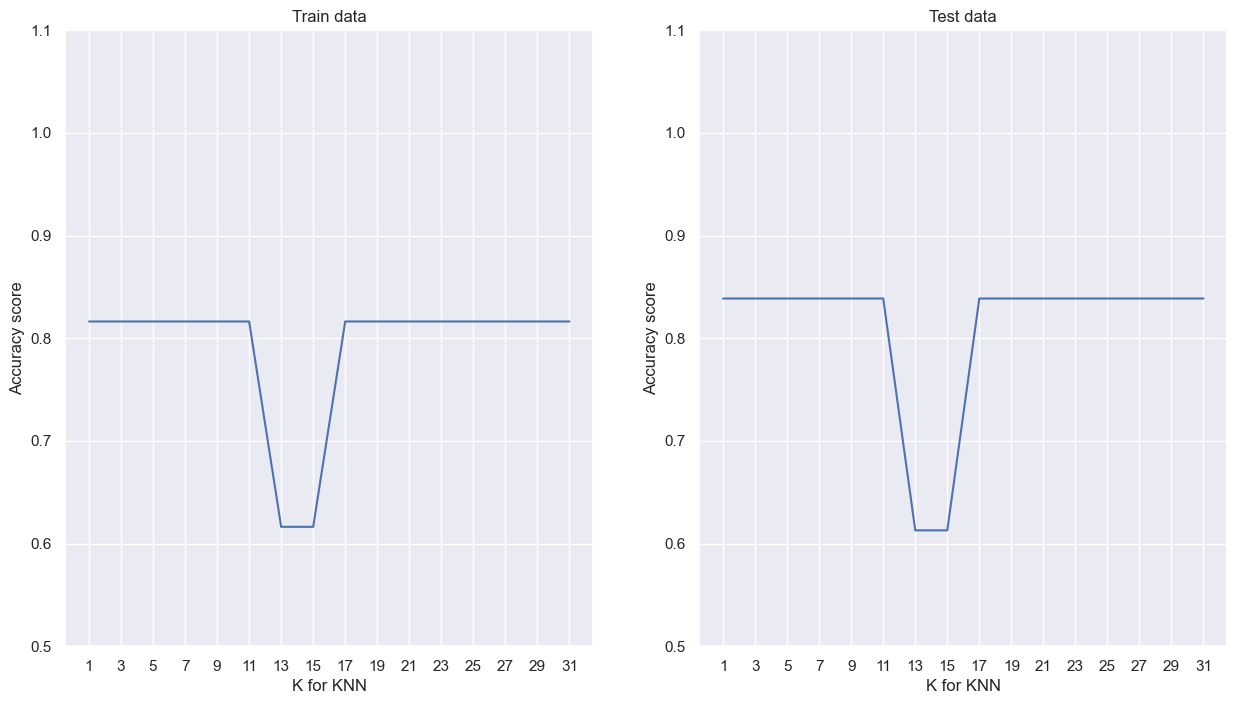

In [518]:
# visualize the finding

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))


ax1.plot(range(1, 33, 2), scores_train)
ax1.set_title('Train data')
ax1.set_xlabel('K for KNN')
ax1.set_ylabel('Accuracy score')
ax1.set_ylim(0.5, 1.1)
ax1.set_xticks(range(1, 33, 2))

ax2.plot(range(1, 33, 2), scores_test)
ax2.set_title('Test data')
ax2.set_xlabel('K for KNN')
ax2.set_ylabel('Accuracy score')
ax2.set_ylim(0.5, 1.1)
ax2.set_xticks(range(1, 33, 2))


plt.show()


## Question 2c:

Are there particular predictors that are more likely to be missing value?

Answer:

Yes, the official website documetns of the missing values in all the columns and rows.
Alll the missing values can be identifies by the question mark sign.


## Question 2d:

Is the pattern of missing data related to the classes?

No, all th classes have missing values. The values don't have any specific pattern but rather at random.

## Question 2e:

How would you handle missing data? (Use your proposed strategy to handle missing data)


Answer:

The best way to handle missing data is either:
    1, Impute 
    2, Remove the data or the raw/column.
Depending, on the volume if the data we procede with the appropraite choice.
